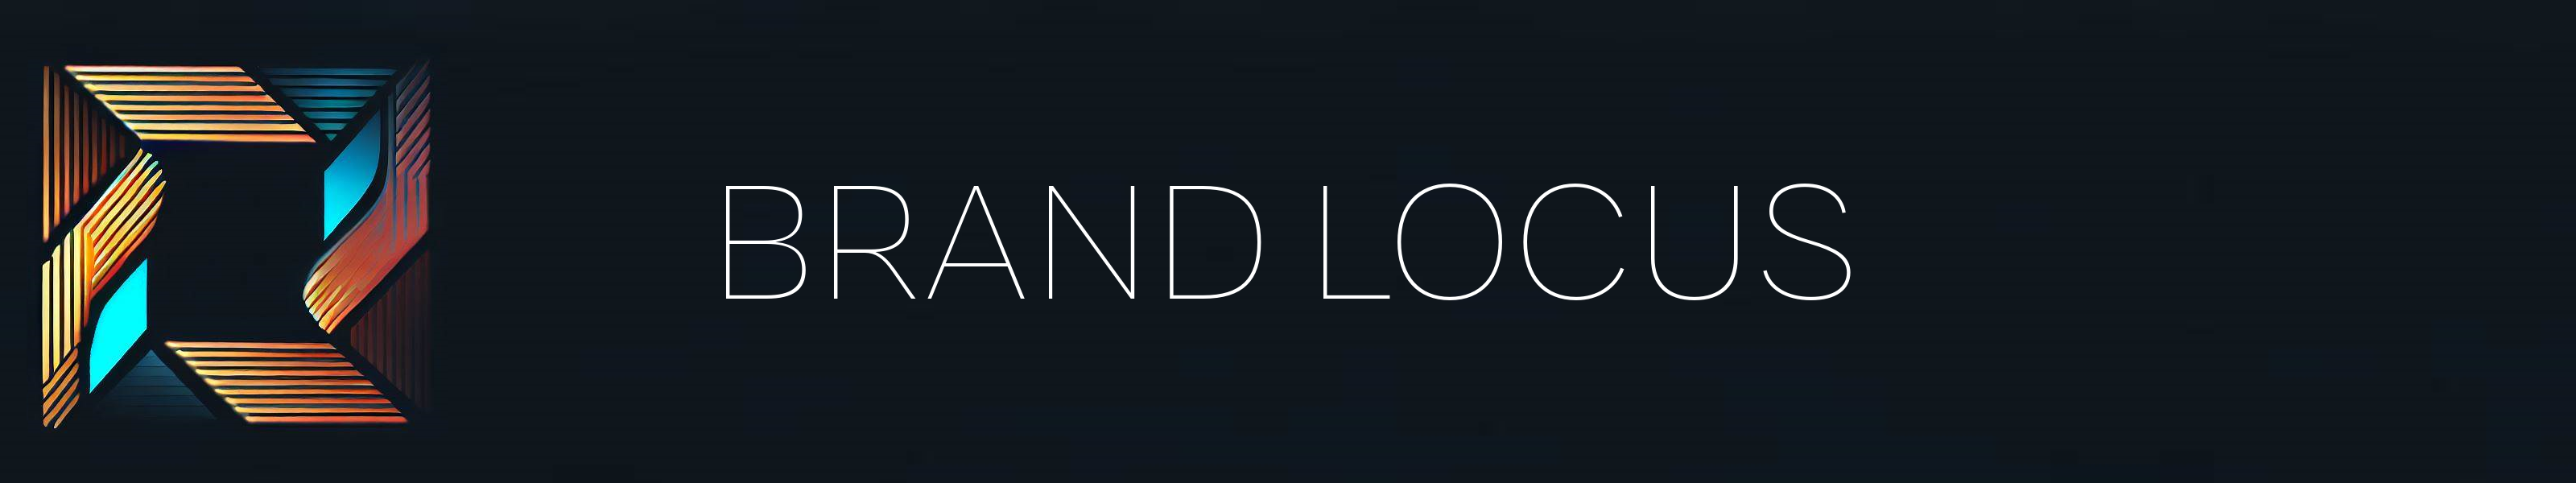

# BRAND LOCUS
Introducing **BRAND LOCUS**, the cutting-edge brand logo detector designed with user-friendliness in mind. Powered by state-of-the-art technology and trained on the extensive OpenLogo dataset featuring a staggering 352 logo classes*, Brand Locus is your go-to solution for logo recognition.

### Key Features:

**Versatile Compatibility**: Brand Locus seamlessly analyzes both images and videos, offering unmatched flexibility in logo detection. Whether it's a static image or a dynamic video, Brand Locus has you covered.

**Broad Logo Database**: With access to a vast database of 352 logo classes★, Brand Locus boasts comprehensive logo recognition capabilities. No matter the brand or logo, Brand Locus can identify it accurately.

**Path, URL, or Youtube Inputs**: Convenience is at the core of Brand Locus. It accepts input from local file paths or web URLs and even Youtube links, making it effortless to analyze logos from various sources.

**Adjustable Confidence Levels**: Tailor Brand Locus to your specific needs by adjusting confidence levels. Fine-tune the detection threshold to achieve the precision and recall that matches your requirements.

In [ ]:
#@title IMAGE SOURCE

SOURCE = "https://fleetnewsdaily.com/wp-content/uploads/2021/08/Xos_Medium_Duty_Electric_Stepvan-scaled.jpg"  # @param {type:"string"}
ConfidenceLevel = 50  # @param {type:"slider", min:0, max:100, step:1}
Detailed_Report = False  # @param {type:"boolean"}

# Convert Confidence Level into Percentage
ConfidenceLevel /= 100

# Necessary Imports and Installations
from IPython import display # for clearing output and displaying HTML content

try:
    import gdown # for downloading YOLO model from Google Drive
except ModuleNotFoundError:
    !pip install gdown
    import gdown
    if not Detailed_Report:
        display.clear_output()

try:
    from ultralytics import YOLO # for logo detection
except ModuleNotFoundError:
    !pip install ultralytics
    from ultralytics import YOLO
    if not Detailed_Report:
        display.clear_output()

import requests # for requesting HTTP images
import os # for checking if a file exists
import shutil # for file copying
from google.colab.patches import cv2_imshow # for showoing images
from PIL import Image # for creating a PIL Image object from a NumPy array
from IPython.display import Image as IPImage, display # for displaying images in Colab

# Define the model path
output_path = "/content/BrandLocus_Current.pt"

# Check if the model already exists in the notebook
if not os.path.exists(output_path):
    # Define the Google Drive file ID
    file_id = "1XFI5h_lxtTmT0xyyMuVPChe6D4c_hi--"

    # Download the model using gdown
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)

# Load the YOLOv8 model
model = YOLO('/content/BrandLocus_Current.pt')

# Define the target path for the image in Colab
TARGET_PATH = "/content/image.jpg"

# Check if SOURCE is a URL or a local file path
if SOURCE.startswith("http://") or SOURCE.startswith("https://"):
    # Download the image from the URL
    response = requests.get(SOURCE)

    if response.status_code == 200:
        # Save the image to the specified target path
        with open(TARGET_PATH, 'wb') as file:
            file.write(response.content)
    else:
        print("Failed to download the image. Check the URL and try again.")
else:
    # Copy local file path to the target path
    if os.path.exists(SOURCE):
        shutil.copy(SOURCE, TARGET_PATH)
    else:
        print(f"Local file not found at {SOURCE}. Please provide a valid local file path.")

# Perform object detection on the image using the YOLO model
results = model.predict(TARGET_PATH, conf=ConfidenceLevel)

if not Detailed_Report:
    from IPython import display
    display.clear_output()

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    from IPython.display import Image as IPImage, display
    display(im)  # Show the image
    im.save('results.jpg')  # save image

In [ ]:
#@title VIDEO SOURCE

video_source = "https://www.youtube.com/watch?v=Y5O1-R-1VNw" # @param {type:"string"}
ConfidenceLevel = 50 # @param {type:"slider", min:0, max:100, step:1}
Detailed_Report = False # @param {type:"boolean"}
ConfidenceLevel = ConfidenceLevel / 100 # Turn ConfidenceLevel into %

# Step 1: import/install necessary libraries

print("STEP 1: Checking Dependencies")
from IPython import display # for clearing output and displaying HTML content
import os # for checking if a file exists, deleting files, and shell commands
import cv2 # for capturing frames, writing frames, and blurring text
import requests # HTTP request to download video
import subprocess # for executing shell commands like extracting audio and compressing video
import re # for identifying a video source from youtube

try:
    import gdown # for downloading YOLO model from Google Drive
except ModuleNotFoundError:
    !pip install gdown
    import gdown
    if Detailed_Report == False:
        display.clear_output()

try:
    from pytube import YouTube # for downloading YouTube sources
except ModuleNotFoundError:
    !pip install pytube
    from pytube import YouTube
    if Detailed_Report == False:
        display.clear_output()

try:
    from ultralytics import YOLO # for logo detection
except ImportError:
    !pip install --upgrade ultralytics
    from ultralytics import YOLO
    if Detailed_Report == False:
        display.clear_output()
try:
    import supervision as sv # for objection detection
except ImportError:
    !pip install supervision
    import supervision as sv
    if Detailed_Report == False:
        display.clear_output()
try:
    from kora.drive import upload_public
except ImportError:
    !pip install -U kora
    from kora.drive import upload_public
    if Detailed_Report == False:
        display.clear_output()

print("Complete")
if Detailed_Report == False:
    display.clear_output()

# Step 2: Remove Previous Runs
print("STEP 2: Remove Previous Runs")

# Paths to the files to be deleted
downloaded_video_path = "/content/downloaded_video.mp4"
audio_path = "/content/original_audio.mp3"
uncompressed_path = "/content/brandlocus_video_no_audio_uncompressed.mp4"
compressed_path = "/content/brandlocus_no_audio_compressed.mp4"
final_output = "/content/brandlocus_video_with_audio.mp4"

# Delete the compressed video file if it exists
if os.path.exists(compressed_path):
    os.remove(compressed_path)

# Delete the downloaded video file if it exists
if os.path.exists(downloaded_video_path):
    if os.path.isfile(downloaded_video_path):
        os.remove(downloaded_video_path)

# Delete the uncompressed video file if it exists
if os.path.exists(uncompressed_path):
    os.remove(uncompressed_path)

# Delete the audio file if it exists
if os.path.exists(audio_path):
    os.remove(audio_path)

# Delete the final_output file if it exists
if os.path.exists(final_output):
    os.remove(final_output)

print("Complete")
if Detailed_Report == False:
    display.clear_output()

# Step 3: Get Video
print("STEP 3: Get Video")

# Function to check if a URL is a YouTube link
def is_youtube_url(url):
    youtube_pattern = r'^(https?://)?(www\.)?(youtube\.com|youtu\.be)/.+$'
    return re.match(youtube_pattern, url) is not None

def download_video(video_source):
    # Check if the input is a YouTube URL
    if is_youtube_url(video_source):
        try:
            # Create a YouTube object
            youtube_video = YouTube(video_source)

            # Get the highest resolution stream
            video_stream = youtube_video.streams.get_highest_resolution()

            # Output Location
            output_video = "/content/downloaded_video.mp4"

            # Download the video
            video_stream.download(output_path="/content/", filename="downloaded_video")

            # Rename the downloaded file to ensure it has the .mp4 extension
            os.rename("/content/downloaded_video", output_video)

            print("Video downloaded successfully.")
            return output_video  # Return the local video path
        except Exception as e:
            print(f"Error downloading video: {str(e)}")
    elif os.path.isfile(video_source):
        # Check if the file exists at the specified path
        return video_source  # Return the local file path
    else:
        # Check if it's a direct URL to an MP4 file
        if video_source.lower().endswith(('.mp4', '.webm', '.mkv', '.flv', '.avi')):
            try:
                response = requests.get(video_source)
                if response.status_code == 200:
                    # Generate a local path to save the downloaded video
                    local_video_path = "/content/downloaded_video.mp4"
                    with open(local_video_path, 'wb') as f:
                        f.write(response.content)
                    print("Video downloaded successfully.")
                    return local_video_path  # Return the local video path
                else:
                    print("Failed to download the video.")
            except Exception as e:
                print(f"Error downloading video: {str(e)}")
        else:
            print("Not a valid YouTube URL or direct link to an MP4 file.")

# Call the download_video function with your video source and store the local video path
local_video_path = download_video(video_source)

print("Complete")
if Detailed_Report == False:
    display.clear_output()

# Step 4: Extract Audio
print("STEP 4: Extract Audio")

original_audio_path = "/content/original_audio.mp3"
extract_audio_command = f"ffmpeg -i {local_video_path} -q:a 0 -map a {original_audio_path}"
print("Extract Audio Command:", extract_audio_command)
os.system(extract_audio_command)

print("Complete")
if Detailed_Report == False:
    display.clear_output()

# Step 5: Load Model and Scan
print("STEP 5: Load Model and Scan")

# Define the model path
output_path = "/content/BrandLocus_Current.pt"

# Check if the model already exists in the notebook
if not os.path.exists(output_path):
    # Define the Google Drive file ID
    file_id = "1XFI5h_lxtTmT0xyyMuVPChe6D4c_hi--"

    # Download the file using gdown
    gdown.download(f"https://drive.google.com/uc?id={file_id}", output_path, quiet=False)

# Load the YOLOv8 model
model = YOLO('/content/BrandLocus_Current.pt')

# Define the video source
cap = cv2.VideoCapture(local_video_path)

# Get the frame width and height from the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the output codec and create a VideoWriter object
output_codec = cv2.VideoWriter_fourcc(*'mp4v')
output_fps = int(cap.get(cv2.CAP_PROP_FPS))
output_path = uncompressed_path
out = cv2.VideoWriter(output_path, output_codec, output_fps, (frame_width, frame_height))

# Loop through the video frames
while cap.isOpened():

    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLOv8 inference on the frame
        results = model.track(frame, persist=True, conf=ConfidenceLevel) [0]

        # Visualize the results on the frame
        annotated_frame = results.plot()

        # Write the annotated frame to the output video
        out.write(annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object, close the output video, and close the display window
cap.release()
out.release()
cv2.destroyAllWindows()

print("Complete")
if Detailed_Report == False:
    display.clear_output()

# Step 6: Compress the video (if needed)
print("STEP 6: Compress Video")
os.system(f"ffmpeg -i {output_path} -vcodec libx264 {compressed_path}")

print("Complete")
if Detailed_Report == False:
    display.clear_output()

# Step 7: Add Audio Back to Video
print("STEP 7: Add Audio Back to Video")
output_video_with_audio = final_output
!ffmpeg -i {compressed_path} -i {original_audio_path} -c:v copy -c:a aac -strict experimental {output_video_with_audio}

print("Complete")
if Detailed_Report == False:
    display.clear_output()

# Step 8: Display
print("Load Video")

url_with_audio = upload_public(output_video_with_audio)
from IPython.display import HTML
HTML(f"""<video src={url_with_audio} width=720 controls/>""")

**★ Brands**:
3M, ABUS, Accenture, Adidas, Airhawk, Airness, Aldi, Alfa Romeo, Allet, Allianz, Aluratek, Amazon, Amcrest, American Express, Android, Anz, APC, Ape Case, Apple, Aquapac, Aral, Armani, Armitron, Aspirin, Asus, AT&T, Athalon, Audi, AXA, Bacardi, Bank of America, Barbie, Barclays, Base, BASF, Batman, Bayer, BBC, BBVA, Becks, Bella Taylor, Bello Digital, BEM, Benrus, BERSHKA, BFGoodrich, BIK, BIONADE, Blackmores, Blizzard Entertainment, BMW, Boeing, Bosch, Bottega Veneta, Bridgestone, Budweiser, Bulgari, Burger King, Calvin Klein, Canon, Carglass, Carlsberg, Carters, Cartier, Caterpillar, Chanel, Cheetos, Chevrolet, Chevron, Chick-fil-a, Chimay, Chiquita, Cisco, Citi, Citroen, Coach, Coca-cola, Colgate, Comedy Central, Converse, Corona, Costa, Costco, CPA Australia, CVS, Danone, Dexia, DHL, Disney, Doritos, Dr. Pepper, Dunkin Donuts, ebay, EC, Erdinger, ESPN, ESSO, Evernote, Facebook, FedEx, Ferrari, Firefox, Firelli, Fly Emirates, Ford, Fosters, Frito Lay, Fritos, Gap, General Electric, Gildan, Gillette, Goodyear, Google, Gucci, Guinness, Hanes, Head, Heineken, Herald Sun, Hermes, Hershey's, HH, Hisense, H&M, Home Depot, Honda, HP, HSBC, Huawei, Hyundai, IBM,  Ikea, Infiniti, Intel, Internet Explorer, Jack in the Box, Jacob's Creek, Jagermeister, J.Crew, Jello, Johnny Walker, Jurlique, Kellogg's, KFC, Kia, KitKat, Kodak, Kraft, Lacoste, Lamborghini, Lay's, LEGO, Levi's, Lexus, LG, London Underground, L'Oreal, Lotto, Luxottica, LV, Marlboro, Maserati, Mastercard, Maxwell House, Maxxis, McCafe, McDonald's, Medibank, Mercedes Benz, Michelin, Microsoft, Milka, Miller High Life, Mini, Miracle Whip, Mitsubishi, MK, Mobil, Motorola, MTV, NASA, New Balance, NBC, Nescafe, Netflix, Nike, Nintendo, Nissan, Nivea, North Face, NVIDIA, Obey, Olympics, Opel, Optus, Oracle, Pampers, Panasonic, Pau Laner, Pepsi, Philadelphia, Phillips, Pizza Hut, Planters, Playstation, Polo Ralph Lauren, Porsche, Prada, Puma, Quick, RBC, Recycling, Redbull, Reebok, Reeses, Renault, Republican, Rittersport, Rolex, Ruffles, Samsung, Santander, SAP, Schwinn, Scion, SEGA, Select, Shell, Siemens, Singha, Skechers, Sony, Soundcloud, Soundrop, Spar, Spider Man, Sprite, Standard Liege, Starbucks, Stella Artois, Subaru, Subway, Sunchips, Superman, Supreme, Suzuki, T-mobile, Taco Bell, Target, Tesla Motors, Texaco, Thomson Reuters, Tiger Wash, Timberland, Tissot, TNT, Tommy Hilfiger, Tostitos, Total, Toyota, Tsingtao, Twitter, Umbro, Under Armour, Unicef, Uniqlo, United Nations, UPS, Vaio, Velveeta, Venus, Verizon, Visa, Vodafone, Volkswagen, Volvo, Walmart, Warner Bros, Wells Fargo, Wii, William Hill, Windows, Wordpress, Xbox, Yahoo, Yamaha, Yonex, Youtube, and Zara.